🎯 Desafio dia 92 — Participação em Eventos Culturais

📂 Dataset: desafio_dia_92_eventos_culturais.csv

🔍 Contexto: A Secretaria de Cultura deseja entender melhor o perfil dos participantes de eventos culturais (shows, cinema, teatro, etc.) ao longo da semana, com base na idade, gênero e avaliação dos eventos.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

- Preencha os valores ausentes em avaliacao_evento com a moda por tipo de evento.

📊 Análise geral

- Qual o tipo de evento mais frequentado por pessoas acima de 40 anos?

- Qual dia da semana tem a maior média de avaliação?

📈 Visualização de dados

- Construa um gráfico de calor (heatmap) que mostre a quantidade de eventos frequentados por genero e evento.

🤖 Machine Learning - Classificação (leve)

- Crie um modelo simples de classificação para prever se a avaliacao_evento será alta (4 ou 5) ou baixa (1 a 3) com base em:

        genero, idade, evento, dia_semana

    Transforme avaliacao_evento em uma nova coluna binária chamada avaliacao_alta.

    Use:

        get_dummies, train_test_split, LogisticRegression

        Avalie com accuracy_score e confusion_matrix.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("desafio_dia_92_eventos_culturais.csv")
df.head()

,id_participante,genero,idade,evento,dia_semana,avaliacao_evento
0,8000,Outro,30,Cinema,Segunda,5.0
1,8001,Outro,38,Festival,Terça,5.0
2,8002,Outro,54,Festival,Sexta,3.0
3,8003,Outro,53,Exposição,Segunda,4.0
4,8004,Masculino,34,Festival,Segunda,5.0


In [3]:
#Preencha os valores ausentes em avaliacao_evento com a moda por tipo de evento.
df["avaliacao_evento"] = df["avaliacao_evento"].fillna(
    df.groupby("evento")["avaliacao_evento"].transform(lambda x: x.mode()[0])
)
df["avaliacao_evento"].isna().sum()

np.int64(0)

In [6]:
#Qual o tipo de evento mais frequentado por pessoas acima de 40 anos?
idade40 = df[df["idade"] > 40]
evento_freq_idade = idade40.groupby("evento")["idade"].size()
print(evento_freq_idade)

evento
Cinema       59
Exposição    54
Festival     62
Show         56
Teatro       42
Name: idade, dtype: int64


In [8]:
#Qual dia da semana tem a maior média de avaliação?
dia_maior_avaliacao = df.groupby("dia_semana")["avaliacao_evento"].mean().sort_values(ascending=False)
print(dia_maior_avaliacao)

dia_semana
Sábado     3.774194
Quarta     3.746988
Terça      3.746479
Segunda    3.707692
Quinta     3.700000
Domingo    3.675000
Sexta      3.536232
Name: avaliacao_evento, dtype: float64


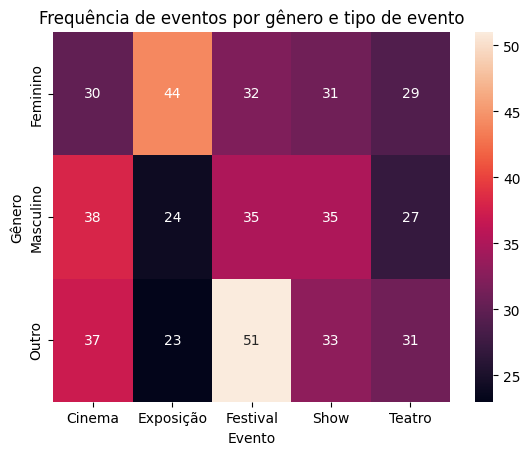

In [17]:
#Construa um gráfico de calor (heatmap) que mostre a quantidade de eventos frequentados por genero e evento.
tabela = df.pivot_table(index="genero", columns="evento", aggfunc="size", fill_value=0)

sns.heatmap(tabela, annot=True)
plt.title("Frequência de eventos por gênero e tipo de evento")
plt.ylabel("Gênero")
plt.xlabel("Evento")
plt.show()

In [20]:
#Crie um modelo simples de classificação para prever se a avaliacao_evento será alta (4 ou 5) ou baixa (1 a 3) com base em
df["avaliacao_alta"] = df["avaliacao_evento"].isin([4, 5])

X = df[["genero", "idade", "evento", "dia_semana"]]
y = df["avaliacao_alta"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6466666666666666
[[ 1 52]
 [ 1 96]]
